In [57]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
import tensorflow as tf
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
# Import cvs file (easy_visa_cleaned_NoOutliers.csv) and check imported columns
easy_visa_original_data_df = pd.read_csv("easy_visa_cleaned_NoOutliers.csv")
easy_visa_original_data_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
1,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified
2,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
3,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
4,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified


In [3]:
#create a working dataframe
easy_visa_df = easy_visa_original_data_df.copy()

In [4]:
# Remove column "case_id"
easy_visa_df=easy_visa_df.drop(["case_id"], axis=1)

# As the study uses only wages reported as "year", the columns "unit_of_wage" is removed as contains only "year"
easy_visa_df=easy_visa_df.drop(["unit_of_wage"], axis=1)

# Check dataframe
easy_visa_df.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,full_time_position,case_status
0,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Y,Certified
1,Africa,Master's,Y,N,1082,2005,South,149907.39,Y,Certified
2,Asia,Master's,Y,N,2339,2012,South,78252.14,Y,Certified
3,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Y,Certified
4,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Y,Certified
5,Europe,Doctorate,Y,N,2251,1995,South,67514.76,Y,Certified
6,Asia,Master's,N,N,2465,2004,Midwest,83588.56,Y,Certified
7,Asia,High School,Y,N,4069,2005,Northeast,70813.09,Y,Denied
8,Asia,Bachelor's,Y,N,1652,2007,Midwest,107196.03,Y,Certified
9,Asia,High School,Y,N,4897,1987,West,74108.02,Y,Denied


In [5]:
# checking number of columns and number of entries
easy_visa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18430 entries, 0 to 18429
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              18430 non-null  object 
 1   education_of_employee  18430 non-null  object 
 2   has_job_experience     18430 non-null  object 
 3   requires_job_training  18430 non-null  object 
 4   no_of_employees        18430 non-null  int64  
 5   yr_of_estab            18430 non-null  int64  
 6   region_of_employment   18430 non-null  object 
 7   prevailing_wage        18430 non-null  float64
 8   full_time_position     18430 non-null  object 
 9   case_status            18430 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.4+ MB


the dataframe contains 10 columns and total of 18430 rows....Data Types are as shown above

In [6]:
# DataFrame stats
easy_visa_df.describe(include='all')

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,full_time_position,case_status
count,18430,18430,18430,18430,18430.000000,18430.000000,18430,18430.000000,18430,18430
unique,6,4,2,2,NaN,NaN,5,NaN,2,2
top,Asia,Bachelor's,Y,N,NaN,NaN,South,NaN,Y,Certified
freq,12366,7406,11032,16169,NaN,NaN,5006,NaN,16376,12840
mean,NaN,NaN,NaN,NaN,2223.555833,1994.329951,NaN,77813.302024,NaN,NaN
std,NaN,NaN,NaN,NaN,1504.850983,16.279233,NaN,44402.797942,NaN,NaN
min,NaN,NaN,NaN,NaN,11.000000,1936.000000,NaN,104.170000,NaN,NaN
25%,NaN,NaN,NaN,NaN,971.000000,1987.000000,NaN,43050.517500,NaN,NaN
50%,NaN,NaN,NaN,NaN,1989.000000,1999.000000,NaN,74635.865000,NaN,NaN
75%,NaN,NaN,NaN,NaN,3266.000000,2006.000000,NaN,109132.965000,NaN,NaN


In [7]:
# Get number of unique values in each column 
get_unique_counts = easy_visa_df.columns.tolist()
easy_visa_df[get_unique_counts].nunique()

continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           5368
yr_of_estab                 81
region_of_employment         5
prevailing_wage          18420
full_time_position           2
case_status                  2
dtype: int64

In [8]:
#checking unique value counts for each categorical columns in the dataframe
categorical_columns = list(easy_visa_df.select_dtypes("object").columns)

for entry_column in categorical_columns:
    unique_count=easy_visa_df[entry_column].value_counts()
    print(unique_count)
    print("\n*************************************\n")

Asia             12366
Europe            2844
North America     2171
South America      526
Africa             394
Oceania            129
Name: continent, dtype: int64

*************************************

Bachelor's     7406
Master's       6981
High School    2389
Doctorate      1654
Name: education_of_employee, dtype: int64

*************************************

Y    11032
N     7398
Name: has_job_experience, dtype: int64

*************************************

N    16169
Y     2261
Name: requires_job_training, dtype: int64

*************************************

South        5006
Northeast    4994
West         4869
Midwest      3292
Island        269
Name: region_of_employment, dtype: int64

*************************************

Y    16376
N     2054
Name: full_time_position, dtype: int64

*************************************

Certified    12840
Denied        5590
Name: case_status, dtype: int64

*************************************



In [9]:
# Convert categorical data to numeric with `pd.get_dummies`

columns_to_convert = ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'full_time_position', 'case_status']
easy_visa_df = pd.get_dummies(easy_visa_df, columns=columns_to_convert)
easy_visa_df.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Bachelor's,...,requires_job_training_Y,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,full_time_position_N,full_time_position_Y,case_status_Certified,case_status_Denied
0,2412,2002,83425.65,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,1082,2005,149907.39,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,2339,2012,78252.14,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,4985,1994,53635.39,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
4,4810,2012,74362.19,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0


In [10]:
# The target is predict the visa status (Denied or Certified). The column 'case_status' represents visa status. 
# This column is split in two columns ("case_status_Certified" and "case_status_Denied"). as the two columns compliment each others,
# one of them is dropped
easy_visa_df=easy_visa_df.drop(columns=["case_status_Denied"])
easy_visa_df.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Bachelor's,...,requires_job_training_N,requires_job_training_Y,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,full_time_position_N,full_time_position_Y,case_status_Certified
0,2412,2002,83425.65,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1
1,1082,2005,149907.39,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
2,2339,2012,78252.14,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
3,4985,1994,53635.39,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,1
4,4810,2012,74362.19,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,1


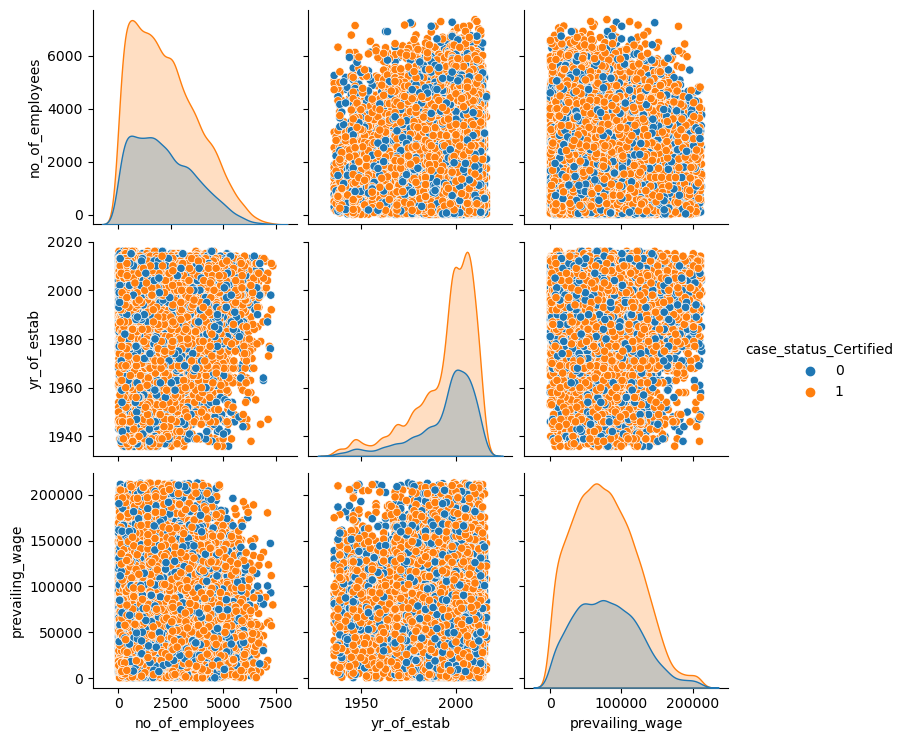

In [11]:
# create pair plots to chekc the degree of non-linearity bwteen the columns in the dataframe
sns.pairplot(data=easy_visa_df, hue='case_status_Certified', vars=['no_of_employees', 'yr_of_estab', 'prevailing_wage'])
plt.show()

In [43]:
# Split data into features and target arrays

y = easy_visa_df.case_status_Certified.values
X = easy_visa_df.drop(columns="case_status_Certified").values

# Split data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [44]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [45]:
# Define the model - deep neural network
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="sigmoid", input_dim=24))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 80)                2000      
                                                                 
 dense_19 (Dense)            (None, 50)                4050      
                                                                 
 dense_20 (Dense)            (None, 1)                 51        
                                                                 
Total params: 6101 (23.83 KB)
Trainable params: 6101 (23.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
432/432 [==============================] - 1s 1ms/step - loss: 0.5495 - accuracy: 0.7217
Epoch 2/200
432/432 [==============================] - 0s 1ms/step - loss: 0.5195 - accuracy: 0.7466
Epoch 3/200
432/432 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.7470
Epoch 4/200
432/432 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.7494
Epoch 5/200
432/432 [==============================] - 0s 1ms/step - loss: 0.5166 - accuracy: 0.7504
Epoch 6/200
432/432 [==============================] - 0s 1ms/step - loss: 0.5145 - accuracy: 0.7493
Epoch 7/200
432/432 [==============================] - 0s 1ms/step - loss: 0.5138 - accuracy: 0.7484
Epoch 8/200
432/432 [==============================] - 0s 1ms/step - loss: 0.5125 - accuracy: 0.7498
Epoch 9/200
432/432 [==============================] - 0s 1ms/step - loss: 0.5116 - accuracy: 0.7510
Epoch 10/200
432/432 [==============================] - 0s 1ms/step - loss: 0.5099 - accura

432/432 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.7679
Epoch 82/200
432/432 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.7657
Epoch 83/200
432/432 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.7667
Epoch 84/200
432/432 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.7659
Epoch 85/200
432/432 [==============================] - 0s 1ms/step - loss: 0.4720 - accuracy: 0.7675
Epoch 86/200
432/432 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.7661
Epoch 87/200
432/432 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 0.7665
Epoch 88/200
432/432 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.7664
Epoch 89/200
432/432 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.7661
Epoch 90/200
432/432 [==============================] - 0s 1ms/step - loss: 0.4711 - accuracy: 

432/432 [==============================] - 0s 1ms/step - loss: 0.4444 - accuracy: 0.7798
Epoch 161/200
432/432 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.7828
Epoch 162/200
432/432 [==============================] - 0s 1ms/step - loss: 0.4437 - accuracy: 0.7810
Epoch 163/200
432/432 [==============================] - 0s 1ms/step - loss: 0.4439 - accuracy: 0.7824
Epoch 164/200
432/432 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.7811
Epoch 165/200
432/432 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.7814
Epoch 166/200
432/432 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.7833
Epoch 167/200
432/432 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.7832
Epoch 168/200
432/432 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.7828
Epoch 169/200
432/432 [==============================] - 0s 1ms/step - loss: 0.4406 - a

In [48]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
print("\n------------------------------------------------------------------------------------------\n")

# Create Output Report on the testing dataset
y_pred = nn.predict(X_test_scaled)
classification_report_output = classification_report(y_test, y_pred.round())
print("Classification Report:\n", classification_report_output)

144/144 - 0s - loss: 0.5681 - accuracy: 0.7322 - 189ms/epoch - 1ms/step
Loss: 0.5680781602859497, Accuracy: 0.7322048544883728

------------------------------------------------------------------------------------------

144/144 [==============================] - 0s 846us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.46      0.51      1398
           1       0.78      0.85      0.82      3210

    accuracy                           0.73      4608
   macro avg       0.68      0.66      0.66      4608
weighted avg       0.72      0.73      0.72      4608



The model seems able to predict the case status "Certified" (presented by 1) better than "Denied" (presented by 0).
Percision and recall values for "Certified" are 78% and 85% respectivly. The model accuracy is 0.73
The second attempt will be to use Cross-validation using KFold to see if it improves the predication accuracy.

In [49]:
# Add all input features to a list to check relative importance of each feature
input_features = easy_visa_df.columns.tolist()[:-1]
print(input_features)

['no_of_employees', 'yr_of_estab', 'prevailing_wage', 'continent_Africa', 'continent_Asia', 'continent_Europe', 'continent_North America', 'continent_Oceania', 'continent_South America', "education_of_employee_Bachelor's", 'education_of_employee_Doctorate', 'education_of_employee_High School', "education_of_employee_Master's", 'has_job_experience_N', 'has_job_experience_Y', 'requires_job_training_N', 'requires_job_training_Y', 'region_of_employment_Island', 'region_of_employment_Midwest', 'region_of_employment_Northeast', 'region_of_employment_South', 'region_of_employment_West', 'full_time_position_N', 'full_time_position_Y']


In [54]:
# One way to Check importance of each feature is by using the sum of weight in the first layer 
weights = []
first_layer_weights = nn.layers[0].get_weights()[0]
for i, features in enumerate(input_features):
    weight_magnitude = np.abs(first_layer_weights[i, :]).sum()
    weights.append(weight_magnitude)
    print(f"Weight Magnitude for {features} is {weight_magnitude}")

Weight Magnitude for no_of_employees is 67.27151489257812
Weight Magnitude for yr_of_estab is 57.39846420288086
Weight Magnitude for prevailing_wage is 62.619346618652344
Weight Magnitude for continent_Africa is 38.55569839477539
Weight Magnitude for continent_Asia is 35.460227966308594
Weight Magnitude for continent_Europe is 50.744781494140625
Weight Magnitude for continent_North America is 41.470237731933594
Weight Magnitude for continent_Oceania is 33.506370544433594
Weight Magnitude for continent_South America is 36.654640197753906
Weight Magnitude for education_of_employee_Bachelor's is 41.434547424316406
Weight Magnitude for education_of_employee_Doctorate is 56.169559478759766
Weight Magnitude for education_of_employee_High School is 59.25391387939453
Weight Magnitude for education_of_employee_Master's is 46.57139587402344
Weight Magnitude for has_job_experience_N is 47.77481460571289
Weight Magnitude for has_job_experience_Y is 45.789161682128906
Weight Magnitude for requires_

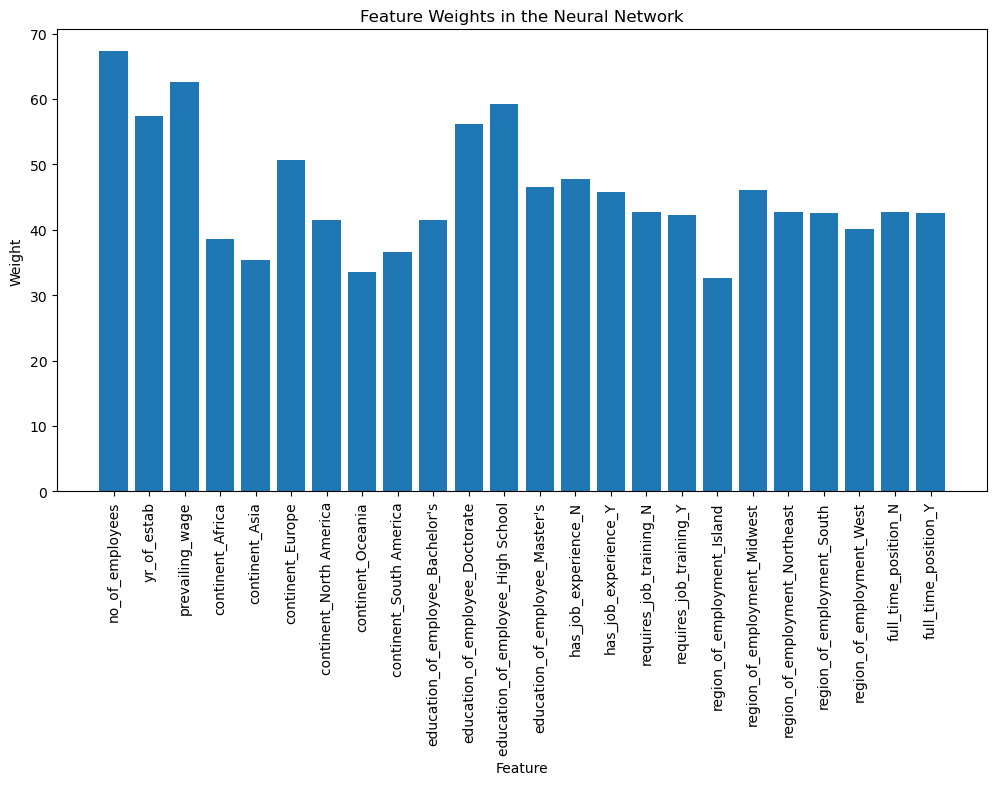

In [56]:
# Create a bar plot for the weights
plt.figure(figsize=(12, 6))
plt.bar(range(len(weights)), weights)
plt.xticks(range(len(weights)), input_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Feature Weights in the Neural Network')
plt.show()

It appears that number of employees in the company, the year the company established and the wage are important to the model.
For example: for education it seems High School and Doctorate contribute more to the model than Master's and Bachelor's.

Also, full-time_position_Y and full_time_position_N seem to have equal contribution to the model.

Other conclusions may also be drawn

In [51]:
# save the model using pickle
pickle.dump(nn, open('one_run\model.pkl', 'wb'))

In [42]:
# USING CROSS VALIDATION

# Import KFold
from sklearn.model_selection import KFold

# Split our preprocessed data into our features and target arrays
y = easy_visa_df.case_status_Certified.values
X = easy_visa_df.drop(columns="case_status_Certified").values

# Building Neural Netwok Deep Learning
nn_xv = tf.keras.models.Sequential()
nn_xv.add(tf.keras.layers.Dense(units=80, activation="sigmoid", input_dim=24))
nn_xv.add(tf.keras.layers.Dense(units=50, activation="sigmoid"))
nn_xv.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_xv.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Cross Validation Number of folds for K-fold
num_of_folds = 10

# Initialize K-fold cross-validation
kf = KFold(n_splits=num_of_folds, shuffle=True, random_state=42)

# Lists to Store Last Accuracy for each fold - Training
last_accuracy_for_each_fold = []

# Lists to Store Accuracy from each fold - Testing
all_accuracy_scores = []

# Lists to Store Model Loss from each fold - Testing
all_model_loss_scores = []

i = 1
for train_index, test_index in kf.split(X):
    
    # Split the data into training and testing sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit and transform the StandardScaler on the training and testing data
    scaler = StandardScaler()
    X_scaler = scaler.fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)


    # Train the model for the specified number of epochs
    training_steps = nn_xv.fit(X_train_scaled, y_train, epochs=200, verbose=0)
    
    # Save the last accuracy in the training set and append to its list
    last_accuracy = training_steps.history['accuracy'][-1]
    last_accuracy_for_each_fold.append(last_accuracy)
    
    # Generate Outp Report
    y_pred = nn_xv.predict(X_test_scaled)
    classification_report_output = classification_report(y_test, y_pred.round())
    print("Classification Report:\n", classification_report_output)
    print("\n------------------------------------------------------------------------------------------\n")
    

    # Evaluate the model on the test data and store the accuracy
    model_loss, accuracy = nn_xv.evaluate(X_test_scaled, y_test, verbose=0)
    
    # Store accuracy of testing data to its list
    all_accuracy_scores.append(accuracy)
    
     # Store model loss of testing data to its list
    all_model_loss_scores.append(model_loss)
    
    # Store each run for each KFold
    file_name = f"SS_runs/model_number_{i}.pkl"
    with open(file_name, 'wb') as file:
        pickle.dump(nn_xv, file)
    i=i+1
    
print("\n------------------------------------------------------------------------------------------\n")
print("Last Accuracy From each Run")
print(last_accuracy_for_each_fold)
print("\n------------------------------------------------\n")
print("Accuracy Scores")
print(all_accuracy_scores)
print("\n------------------------------------------------\n")
print("Model Loss Scores")
print(all_model_loss_scores)

# Calculate and print the mean of accuracy scores and model loss (testing data)
mean_accuracy = np.mean(all_accuracy_scores)
mean_model_loss = np.mean(all_model_loss_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Mean Model Loss: {mean_model_loss:.3f}")

58/58 [==============================] - 0s 882us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.38      0.45       579
           1       0.75      0.86      0.80      1264

    accuracy                           0.71      1843
   macro avg       0.65      0.62      0.62      1843
weighted avg       0.69      0.71      0.69      1843


------------------------------------------------------------------------------------------

58/58 [==============================] - 0s 856us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52       533
           1       0.80      0.83      0.81      1310

    accuracy                           0.73      1843
   macro avg       0.67      0.66      0.67      1843
weighted avg       0.73      0.73      0.73      1843


------------------------------------------------------------------------------------------

58

The accuracy for the testing dataset has improved by about 6-7% to an average of 78%. The maximum accuracy for all the models 
reaches a value of about 84%. Maximum percision and recall for "Certified" cases are 88% and 89% respectivly. For "Denied" cases the maximum percision is 73% and maximum recall is 72%. These values are higher than what have been obtianed for the single model performed above. The model is more relaible in predicting "Certified" cases than "Denied" Ones. The reason for that is, may be, the majority of the dataset has certified cases than denied cases: 12840 for certified
(about 70% of the dataset) and 5590 for denied (about 30% of the dataset)